### Сессия pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
spark = SparkSession.builder.appName("Basic").getOrCreate()

###################################################################

from pyspark.sql import SparkSession

app_name = 'Your App'

conf = {
    'spark.dynamicAllocation.enabled': 'true',
	'spark.shuffle.service.enabled': 'true',
    'spark.dynamicAllocation.maxExecutors': 10,
    'spark.executor.memory': '32g',
    'spark.executor.cores': '8',
    'spark.driver.memory': '8g',
}

builder = (
    SparkSession
    .builder
    .appName(app_name)
)

for k, v in conf.items():
    builder.config(k, v)

spark = builder.getOrCreate()

### Чтение паркета

In [ ]:
df_0 = spark.read.parquet("/export/test_parquet_edges/part-00000-8f3c29db-f362-4679-9168-34dbe2150a0e-c000.snappy.parquet")
df_1 = spark.read.parquet("/export/test_parquet_edges/part-00001-8f3c29db-f362-4679-9168-34dbe2150a0e-c000.snappy.parquet")

### Объеденть несколько пракетов

In [ ]:
dataframes = [df_0, df_1, df_2, df_4, df_5, df_6, df_7, df_8, df_9, df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_19, df_20, df_23, df_24, df_25, df_26, df_27]
edges = reduce(lambda df1, df2: df1.union(df2), dataframes)

### Фильтрация по полю

In [ ]:
nodes.filter(nodes['__typeName'] == 'mdh_process').select("id", "properties").show(10, truncate=False)

### Аналог like

In [ ]:
nodes.filter(nodes['properties'].contains('__typeName=spark_table')).show()
df.filter(col("name").like("%mes%")).show()

### Парсинг поля словаря. Парсинг map

In [ ]:
##https://sparkbyexamples.com/pyspark/pyspark-convert-dictionary-map-to-multiple-columns/


from pyspark.sql.functions import explode,map_keys,col
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()

dataDictionary = [
        ('James',{'hair':'black','eye':'brown'}),
        ('Michael',{'hair':'brown','eye':None}),
        ('Robert',{'hair':'red','eye':'black'}),
        ('Washington',{'hair':'grey','eye':'grey'}),
        ('Jefferson',{'hair':'brown','eye':''})
        ]

df = spark.createDataFrame(data=dataDictionary, schema = ['name','properties'])
df.printSchema()
df.show(truncate=False)


keysDF = df.select(explode(map_keys(df.properties))).distinct()
keysList = keysDF.rdd.map(lambda x:x[0]).collect()
keyCols = list(map(lambda x: col("properties").getItem(x).alias(str(x)), keysList))
df.select(df.name, *keyCols).show()

### Джоин. Join

In [ ]:
main.join(tables, main.vertexId == tables.id, "inner").select("").show()

### Парсинг атрибута с json 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import from_json
from pyspark.sql.types import MapType,StringType,IntegerType
from pyspark.sql.functions import from_json
from pyspark.sql.types import StructType,StructField
from pyspark.sql.functions import col
spark = SparkSession.builder.appName('www.freshers.in training').getOrCreate()
data = [
(1,"""{"country":"USA","country_id":100}""","USD"),
(2,"""{"country":"UK","country_id":200}""","EURO"),
(3,"""{"country":"INDIA","country_id":300, "type":123456789}""","INR")]
schema= ["sino","cntry_json","currency"]
df = spark.createDataFrame(data,schema)
df.printSchema()
df.show(4,False)
new_df = spark.read.json(df.rdd.map(lambda r: r.cntry_json))
new_df.printSchema()
new_df.show(4,False)

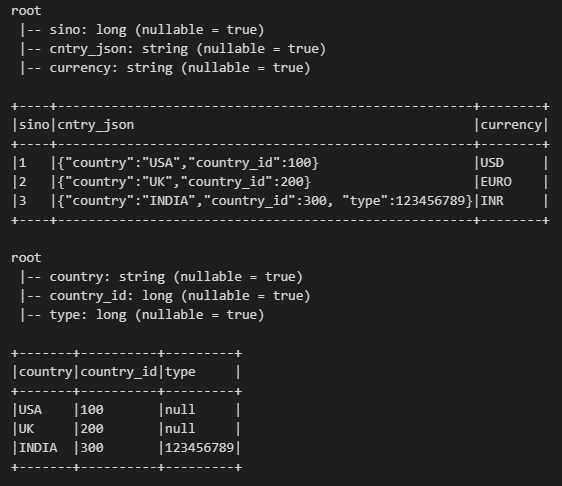

In [ ]:
from pyspark.sql import SparkSession

from pyspark.sql.functions import col, from_json, expr, size, map_keys

 
spark = SparkSession.builder.appName('www.freshers.in training').getOrCreate()

data = [(1, """{"country":"USA","country_id":100}""","USD"),
        (2, """{"country":"UK","country_id":200}""", "EURO"),
        (3, """{"country":"INDIA","country_id":300, "type":123456789}""", "INR")]

schema = ["sino", "cntry_json", "currency"]

df = spark.createDataFrame(data, schema)

# Парсинг JSON и выбор нужных полей

parsed_df = df.select(col("sino"),
                      col("cntry_json"),
                      from_json(col("cntry_json"),"map<string, string>").alias("parsed_json"))

# Добавление колонки с количеством ключей в parsed_json
parsed_df_with_key_count = parsed_df.withColumn("num_keys", size(map_keys(col("parsed_json"))))
# Показать полученный результат
parsed_df_with_key_count.show(10,False)


### Select 

In [ ]:
hbase_table = df.filter(df['__typeName'] == 'hbase_table').select(col("id"),
                                                          from_json(col("properties"), "map<string, string>").alias("properties_json"),
                                                          col("properties"))


hbase_table = hbase_table.select(
    col("id").alias("lineage_id"),
    col("properties_json")["__guid"].alias("atlas_guid"),
    col("properties_json")["Referenceable.__u_qualifiedName"].alias("object_id"),
    col("properties_json")["Asset.__s_name"].alias("object_name"),
    col("properties_json")["nonexisten_column"].alias("object_type"),
    col("properties_json")["__typeName"].alias("source_type"),
    col("properties_json")["__state"].alias("status"),
    col("properties_json")["nonexisten_column"].alias("description"), # заполняет null
    col("properties_json")["nonexisten_column"].alias("comment"),
    col("properties_json")["nonexisten_column"].alias("owner"),
    col("properties_json")["__version"].alias("version"),
    col("properties_json")["__createdBy"].alias("created_by"),
    col("properties_json")["__modifiedBy"].alias("updated_by"),
    col("properties_json")["__timestamp"].alias("created_time"),
    col("properties_json")["__modificationTimestamp"].alias("updated_time"),
    col("properties").alias("properties_json"),
    current_timestamp().alias("insert_timestamp"),)

### Аналог EXCEPT разница двух датафреймов

In [ ]:
df_a = spark.createDataFrame([("a", 3), ("b", 5), ("c", 7)], ["name", "id"])
df_b = spark.createDataFrame([("a", 3), ("b", 10), ("c", 13)], ["name", "id"])
df_a.select('id').subtract(df_b.select('id')).show()
+---+
| id|
+---+
|  7|
|  5|
+---+

### groupBy анлог value_counts

In [ ]:
spark_df.groupBy('column_name').count().orderBy('count')

a = column_sat.groupBy('column_mater_id').agg(countDistinct("source_type").alias("count")).orderBy('count', ascending=False)

### Количество уникальных nunique countDistinct

In [ ]:
atlas_columns.select(countDistinct("column_mater_id")).show()

### Убрать дубли dropDuplicates 

In [ ]:
df.dropDuplicates().show()
df.dropDuplicates(["department","salary"]).show()

### Аналог isin()

In [ ]:
df_1.join(df_2.select("column_mater_id"), "column_mater_id", "inner").show()

### Упаковать код в json. Атрибуты в json

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_json, struct
 
# Создаем SparkSession
spark = SparkSession.builder.appName("MergeColumnsToJSON").getOrCreate()
 
# Создаем исходный датафрейм
data = [(1, "True", "7"),
        (2, "False", None),
        (3, None, "5")]
columns = ["id", "column_nullable", "column_position"]
df = spark.createDataFrame(data, columns)
 
# Обновляем поле properties_json, создав JSON объект
df = df.withColumn("properties_json", to_json(struct(
    col("column_nullable").alias("column_nullable"),
    col("column_position").alias("column_position")
)))
 
# Выбираем только столбцы id и properties_json
result_df = df.select("id", "properties_json")
 
# Выводим результат
result_df.show(truncate=False)

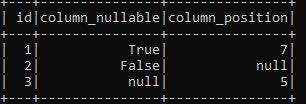
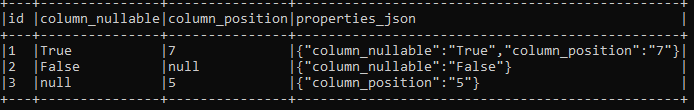

### Путь в спарке. hdfs путь. путь при сохранении. получить дату 

In [ ]:
import datetime
current_date_str = datetime.datetime.now().strftime("%d-%m-%Y")
path = "/user/21180152_ipa/DDS/test/" + current_date_str
df.write.parquet(path)

 ### Функция для проверки наличия подпапок

In [ ]:
import subprocess
hhh = "/user/21180152_ipa/DDS/table_sat"
 
# Функция для проверки наличия подпапок
def check_subdirectories(hdfs_directory):
    try:
        # Выполните команду hdfs dfs -ls и получите результат
        result = subprocess.check_output(["hdfs", "dfs", "-ls", hdfs_directory])
 
        # Если есть подпапки, результат будет содержать строки, начинающиеся с "d"
        if any(line.startswith("d") for line in result.decode("utf-8").split("\n")):
            return True
        else:
            return False
 
    except subprocess.CalledProcessError:
        # Если произошла ошибка при выполнении команды, предположим, что папок нет
        return False
 

 
# Проверка наличия подпапок и вывод результата
if check_subdirectories(hhh):
    print("В директории есть подпапки.")
else:
    print("В директории нет подпапок.")
 

### min max mean 

In [ ]:
df.select([mean("A"), min("A"), max("A")])

### Убрать спецсимволы

In [ ]:
df = df.select(regexp_replace("claster_2", "[^a-zA-Z0-9\s]", ""))
df.withColumn("claster_2", regexp_replace("claster_2", "[^a-zA-Z0-9\s]", ""))